## Comparing fMRI Experimental Designs Using Neurodesign

We simulate and compare five different fMRI designs. The goal is to assess how changes in trial order and inter-trial interval (ITI) affect **estimation efficiency** (Fd), **detection power** (Ff), **collinearity** (Fc), and other metrics.

---

## Credit

Note: This notebook is an extension of Neurodesign's [examples](https://github.com/neuropower/neurodesign/blob/master/examples/comparison_neurodesign.ipynb).

### 🧪 Experimental Setup

- **TR (Repetition Time):** 2 seconds
- **Stimuli:** 3 conditions with probabilities [0.3, 0.3, 0.4]
- **Number of Trials:** 20
- **Contrasts:** C1 vs C2, and C2 vs C3
- **Stimulus Duration:** 1s
- **Pre- and Post-Stimulus Periods:** 0.5s pre, 2s post (e.g., fixation + feedback)
- **ITI Distribution:** Exponential (min: 2s, mean: 2.1s, max: 4s)
- **Noise Autocorrelation (ρ):** 0.3

---

### 🔁 Design 1: Cyclical Order with Fixed ITI

This design repeats conditions 0, 1, 2 in sequence and uses a fixed 2-second ITI. It's balanced and orderly, but lacks temporal variability.

---

### 🧱 Design 2: Blocked Order with Jittered ITI

This design groups conditions in mini-blocks (e.g., 0,0, 1,1, 2,2...) and uses **exponentially distributed ITIs**, making it more naturalistic. This design introduces more variability, which helps reduce collinearity and potentially improves design efficiency.

---

### 🧬 Design 3 & 4: Genetic Crossover

Two new designs are generated by combining elements of Design 1 and Design 2 using a genetic crossover algorithm. These hybrids may benefit from the strengths of both parents (structure + jitter).

---

### 🧪 Design 5: Mutation of Design 1

This design introduces randomness (30% mutation rate) into the condition sequence of Design 1, potentially improving variability while keeping much of the original structure.

---

### 📊 Evaluation: Estimation Efficiency (Fd)

At the end, we compare the **Fe (estimation efficiency)** across all five designs to see which configuration is most statistically powerful for modeling condition-related BOLD responses.

This simulation highlights the importance of thoughtful design in fMRI: even modest changes in order or timing can substantially impact signal estimation quality.

---

## Initial imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurodesign

In [2]:
import os
# Since Neurodesign uses multi-threading internally, limit the number of threads
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

## Define experimental parameters

In [3]:
from rich import print
from neurodesign import generate

# -------------------------------
# DEFINE EXPERIMENTAL PARAMETERS
# -------------------------------

exp = neurodesign.Experiment(
    TR=2,                        # Repetition time (TR) of fMRI acquisition in seconds
    n_trials=20,                 # Number of trials (short toy example)
    P=[0.3, 0.3, 0.4],           # Condition probabilities: Condition 2 is slightly overrepresented
    C=[[1, -1, 0], [0, 1, -1]],  # Contrasts: C1 vs C2, C2 vs C3
    n_stimuli=3,                 # Total number of stimulus conditions
    rho=0.3,                     # Temporal autocorrelation in fMRI noise
    stim_duration=1,            # Duration of each stimulus (in seconds)
    t_pre=0.5,                  # Pre-stimulus baseline (e.g., fixation)
    t_post=2,                   # Post-stimulus period (e.g., feedback)
    ITImodel="exponential",     # Inter-trial interval (ITI) sampling model
    ITImin=2,                   # Minimum ITI
    ITImax=4,                   # Maximum ITI
    ITImean=2.1,                # Mean ITI
)

c:\Users\vguigon\Desktop\Research_directory\research_tests\neurodesign-plus\neurodesign\classes.py:635: UserWarning: the resolution is adjusted to be a multiple of the TR. New resolution: 0.1
  warnings.warn(
c:\Users\vguigon\Desktop\Research_directory\research_tests\neurodesign-plus\neurodesign\classes.py:809: RuntimeWarning: divide by zero encountered in log
  res = (h - 1) * np.log(s) + h * np.log(l) - l * s - np.log(gamma(h))


## Design 1

Fe (estimation efficiency): 115.1820276304868

Fd (detection efficiency): 0.16424550859714046

Fc (frequency mapping to desired probability): 0.29017603634298705

Ff (counterbalancing/collinearity): 0.8571428571428572

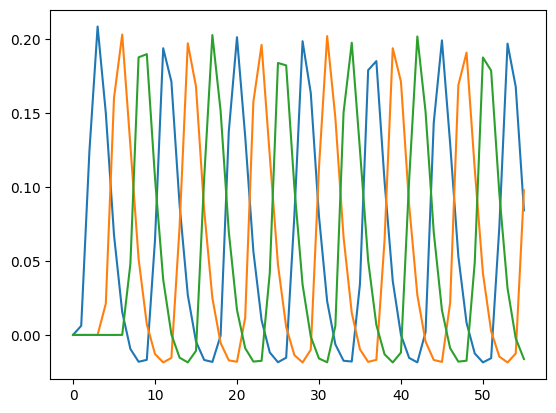

In [4]:
# -------------------------------
# DESIGN 1: CYCLIC ORDER + FIXED ITI
# -------------------------------

design_1 = neurodesign.Design(
    order=[0, 1, 2]*6 + [0, 1],  # Repeating sequence of conditions (C0, C1, C2)
    ITI=[2] * 20,               # Fixed ITI of 2 seconds for all trials
    experiment=exp,
)

# Compute the convolved design matrix and evaluate design quality
design_1.designmatrix()
design_1.FCalc(weights=[0, 0.5, 0.25, 0.25])  # Weighted evaluation of efficiency metrics
design_1.FdCalc()  # Estimation efficiency
design_1.FcCalc()  # Collinearity
design_1.FfCalc()  # Detection power
design_1.FeCalc()  # Frequency balance

plt.plot(design_1.Xconv) 
print(f"Fe (estimation efficiency): {design_1.Fe}")
print(f"Fd (detection efficiency): {design_1.Fd}")
print(f"Fc (frequency mapping to desired probability): {design_1.Fc}")
print(f"Ff (counterbalancing/collinearity): {design_1.Ff}")

## Design 2

Fe (estimation efficiency): 156.65503895603126

Fd (detection efficiency): 0.1905065065980409

Fc (frequency mapping to desired probability): 0.5547984099943215

Ff (counterbalancing/collinearity): 0.8571428571428572

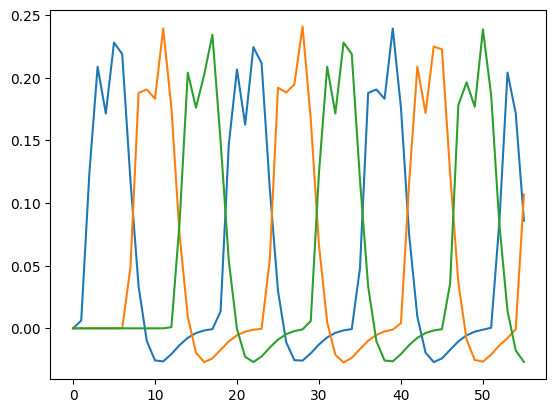

In [5]:
# -------------------------------
# DESIGN 2: BLOCKED ORDER + EXPONENTIAL ITI
# -------------------------------

design_2 = neurodesign.Design(
    order=[0, 0, 1, 1, 2, 2]*3 + [0, 1],  # Blocked condition order (2 reps per block)
    ITI=generate.iti(                   # ITIs drawn from exponential distribution
        ntrials=20, 
        model="exponential", 
        min=1, 
        mean=2, 
        max=4, 
        seed=1234
    )[0],
    experiment=exp,
)

design_2.designmatrix()
design_2.FeCalc()
design_2.FdCalc()
design_2.FcCalc()
design_2.FfCalc()

plt.plot(design_2.Xconv) 

print(f"Fe (estimation efficiency): {design_2.Fe}")
print(f"Fd (detection efficiency): {design_2.Fd}")
print(f"Fc (frequency mapping to desired probability): {design_2.Fc}")
print(f"Ff (counterbalancing/collinearity): {design_2.Ff}")

## Crossover: Designs 3 & 4

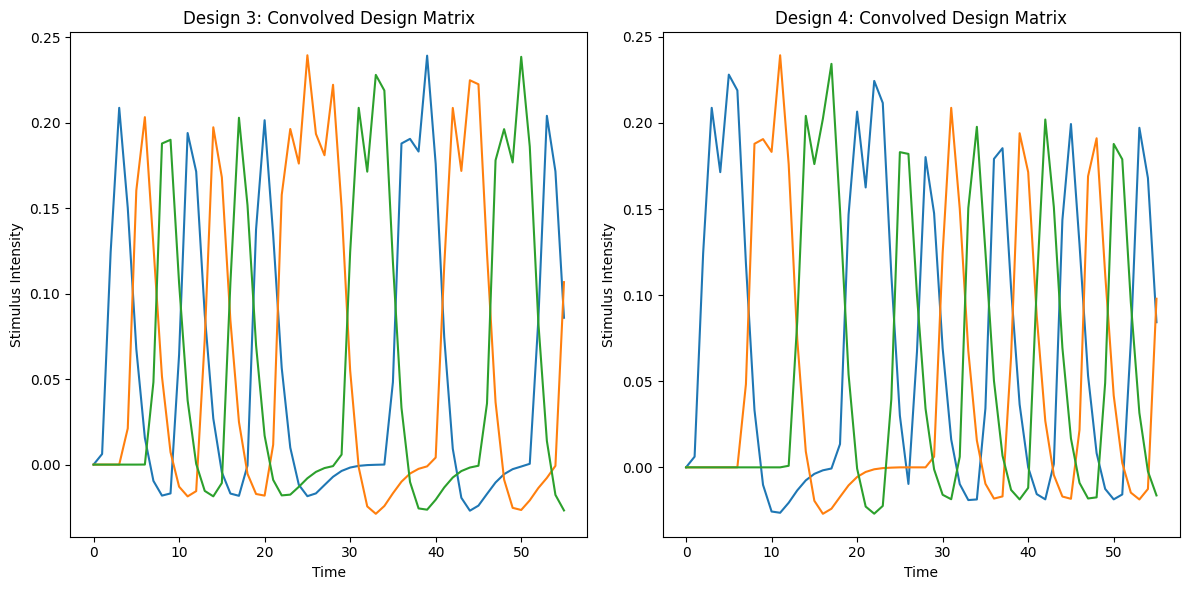

In [6]:
# -------------------------------
# CROSSOVER: DESIGN 3 & 4
# -------------------------------

design_3, design_4 = design_1.crossover(design_2, seed=2000)

design_3.order
design_3.designmatrix()
design_3.FeCalc()
design_3.FdCalc()
design_3.FcCalc()
design_3.FfCalc()

design_4.order
design_4.designmatrix()
design_4.FeCalc()
design_4.FdCalc()
design_4.FcCalc()
design_4.FfCalc()

# Create subplots for side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot design_3 on the first axis
axes[0].plot(design_3.Xconv)
axes[0].set_title('Design 3: Convolved Design Matrix')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Stimulus Intensity')

# Plot design_4 on the second axis
axes[1].plot(design_4.Xconv)
axes[1].set_title('Design 4: Convolved Design Matrix')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Stimulus Intensity')

# Show the plots
plt.tight_layout()
plt.show()

## Mutation: Design 5

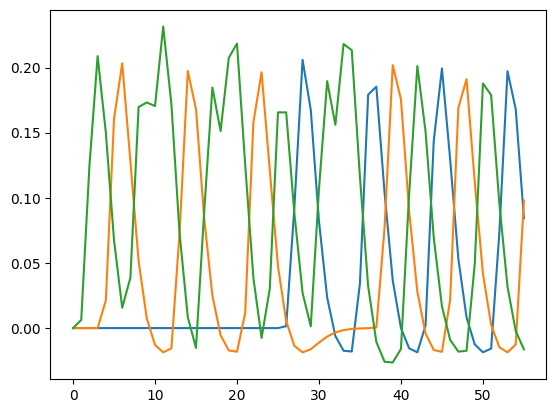

In [7]:
# -------------------------------
# MUTATION: DESIGN 5 (MODIFIED VERSION OF DESIGN 1)
# -------------------------------

design_5 = design_1.mutation(0.3, seed=2000)  # 30% mutation rate
design_5.designmatrix()
design_5.FeCalc()
design_5.FdCalc()
design_5.FcCalc()
design_5.FfCalc()

plt.plot(design_5.Xconv) 

## Scores

In [10]:
# -------------------------------
# SUMMARY OF ESTIMATION EFFICIENCIES (Fe)
# -------------------------------

result = (
    "RESULTS \n"
    "======= \n"
    f"DESIGN 1: Fe = {design_1.Fe} \n"
    f"DESIGN 2: Fe = {design_2.Fe} \n"
    f"DESIGN 3: Fe = {design_3.Fe} \n"
    f"DESIGN 4: Fe = {design_4.Fe} \n"
    f"DESIGN 5: Fe = {design_5.Fe} \n"
)

print(result)

RESULTS 
======= 
DESIGN 1: Fe = 115.1820276304868 
DESIGN 2: Fe = 156.65503895603126 
DESIGN 3: Fe = 172.35596508195334 
DESIGN 4: Fe = 158.94827579257748 
DESIGN 5: Fe = 155.7142927766578

Fe – Estimation Efficiency: This measures how well the design allows for precise estimation of the shape and amplitude of the HRF (hemodynamic response) for each condition.  

We can observe that the design with the higher estimation efficiency is design 3, A cross-over of design 1 with design 2.